In [20]:
#!pip install sklearn
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from genderUtils import *

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning



In [9]:
path =  '../../bog_nu//goldstandard.csv'
df = pd.read_csv(path, sep="\t")
my_palette2 = ['teal', 'lightcoral']
my_palette4 = ['teal','lightseagreen','whitesmoke','mistyrose'] #whitesmoke, darkgray, gainsboro
sns.set_theme(style="darkgrid")


# Boganmeldelser i danske Aviser - uden bog.nu-estimater

Da der har været en del kritik af vores brug af bog.nu's estimater af karakterer, har vi har lavet samme analyse uden Information og Weekendavisen (da de ikke selv giver karakterer). 

I denne notebook analyserer vi dataset med 57.000 boganmeldelser af skønlitteratur skrevet i danske medier i årerne 2010-2021. 

For boganmeldelser skrevet i aviser og regionalaviser har vi 24.753 datapunkter. 
Hvis vi sorterer anmeldelser fra Information of Weekendavisen fra, har vi 18.184 anmeldelser. 

In [25]:
# create a dataframe for reviews written in the categories 'Avis' and 'Regional avis'
df_np = df[(df['media_type_name']== 'Avis')|(df['media_type_name'] == 'Regional avis')]
df_np = df_np[(df_np['media_name']!= 'Information') &(df_np['media_name'] != 'Weekendavisen')]
df_np.shape

(18184, 30)

## Karakterer
Nedenfor viser vores resultater at mandlige anmeldere giver højest karakterer til mandlige forfattere, og at kvindelige anmeldere giver lavere karakterer til kvindelige forfattere. 

Karakterer og kønskombination **med estimater**: 

- Kvindelig anmelder og kvindelig forfatter: **3.9820**
- Kvindelig anmelder og mandlig forfatter: 3.9820  + 0.0881 = **4.0701**
- Mandlig anmelder og kvindelig forfatter: 3.9820  + 0.1140 = **4.096**
- Mandlig anmelder og mandlig forfatter: 3.9820  + 0.2084 = **4.1904**

Karakterer og kønskombination **uden estimater**: 

- Kvindelig anmelder og kvindelig forfatter: **3.9880**
- Kvindelig anmelder og mandlig forfatter: 3.9880 + 0.1028 = **4.0908**
- Mandlig anmelder og kvindelig forfatter: 3.9880 + 0.1244  = **4.1124**
- Mandlig anmelder og mandlig forfatter: 3.9880  + 0.2347  = **4.2227**

Alle resultaterne er statisktisk signifikante med et konfidensinterval på 95 %.

Her kan vi altså se at **karakterforskellen mellem kvinde-kvinde kombinationen og mand-mand kombinationen er større end da vi lavede analysen med bog.nus estimater**. 

Vi ser en forskel på 0.2347 point uden estimater og en forskel på 0.2084 point med estimaterne. 

In [26]:
model_h1 = smf.ols(formula='grades_transformed_6 ~ C(gender_combi)', data=df_np)
res_h1 = model_h1.fit()

res_h1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     grades_transformed_6   R-squared:                       0.008
Model:                              OLS   Adj. R-squared:                  0.008
Method:                   Least Squares   F-statistic:                     43.37
Date:                  Tue, 17 May 2022   Prob (F-statistic):           6.63e-28
Time:                          15:32:43   Log-Likelihood:                -23351.
No. Observations:                 16336   AIC:                         4.671e+04
Df Residuals:                     16332   BIC:                         4.674e+04
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          3.9880      0.018    227.468      0.000       3.954       4.022
C(gender_combi)[T.female_male]     0.1028      0.026      3.909      0.000       0.051       0.154
C(gender_combi)[T.male_female]     0.1244      0.025      4.998      0.000       0.076       0.173
C(gender_combi)[T.male_male]       0.2347      0.021     11.043      0.000       0.193       0.276
==============================================================================
Omnibus:                      440.161   Durbin-Watson:                   1.494
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              475.873
Skew:                          -0.416   Prob(JB):                    4.63e-104
Kurtosis:                       3.084   Cond. No.                         5.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[Text(0, 0, 'Kvinde, Mand'),
 Text(1, 0, 'Mand, Mand'),
 Text(2, 0, 'Kvinde, Kvinde'),
 Text(3, 0, 'Mand, Kvinde')]

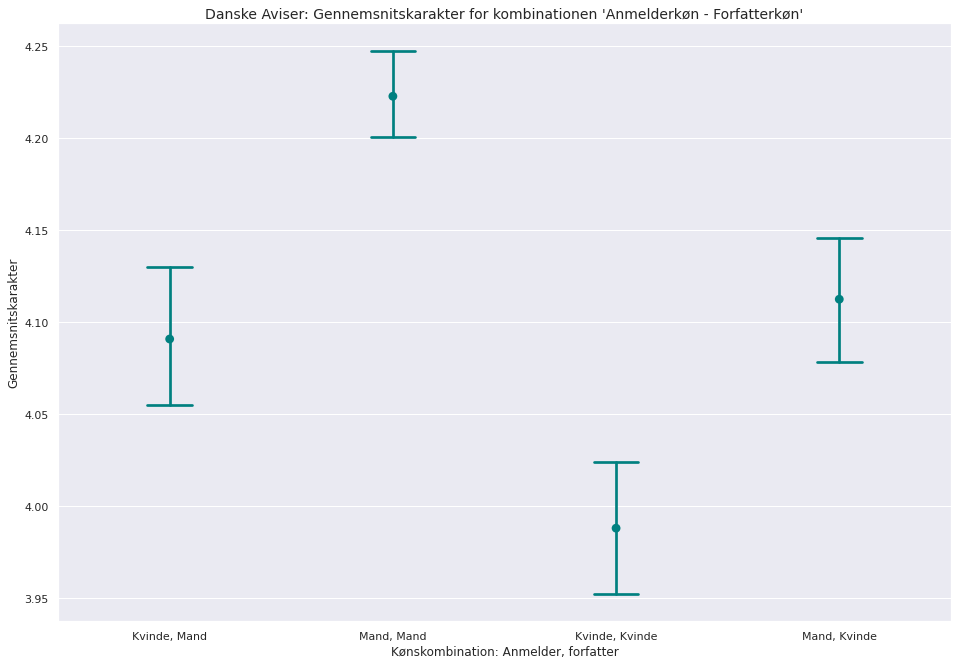

In [28]:
sns.set_theme(style="darkgrid")
sns.set_palette("Dark2", 8, .75)
ax = sns.pointplot(x="gender_combi", y="grades_transformed_6", data=df_np, join=False, ci = 95,capsize=0.2, marker = 'o', color = 'teal')

ax.figure.set_size_inches(16,11)
ax.set_title("Danske Aviser: Gennemsnitskarakter for kombinationen 'Anmelderkøn - Forfatterkøn'",fontdict= { 'fontsize': 14, 'fontweight':'normal'})
ax.set_ylabel('Gennemsnitskarakter')
ax.set_xlabel('Kønskombination: Anmelder, forfatter')
ax.set_xticklabels(['Kvinde, Mand','Mand, Mand','Kvinde, Kvinde','Mand, Kvinde'])



In [31]:
def get_gender_proportions(dataframe, newspaper): 
    total = dataframe.groupby(['gender_combi']).size()
    total_no = total.sum(axis=0)
    female_reviewer = total.female_female + total.female_male
    female_author = total.female_female + total.male_female
    male_reviwer = total.male_male + total.male_female
    male_author = total.female_male + total.male_male

    print("Kvindelige anmeldere i ", newspaper, ":" , female_reviewer, " ud af ", total_no, "i alt. Svarende til ", round(female_reviewer/total_no* 100,2), "%")
    print("Kvindelige forfatter i ", newspaper, ":" , female_author, " ud af ", total_no, "i alt. Svarende til ", round(female_author/total_no* 100,2), "%")
    print("Mandlige anmeldere i ", newspaper, ":" ,male_reviwer, " ud af ", total_no, "i alt. Svarende til ", round(male_reviwer/total_no* 100,2), "%")
    print("Mandlige forfatter i ", newspaper, ":" , male_author, " ud af ", total_no, "i alt. Svarende til ", round(male_author/total_no* 100,2), "%")

get_gender_proportions(df_np, "Newspaper")

Kvindelige anmeldere i  Newspaper : 5982  ud af  16336 i alt. Svarende til  36.62 %
Kvindelige forfatter i  Newspaper : 6596  ud af  16336 i alt. Svarende til  40.38 %
Mandlige anmeldere i  Newspaper : 10354  ud af  16336 i alt. Svarende til  63.38 %
Mandlige forfatter i  Newspaper : 9740  ud af  16336 i alt. Svarende til  59.62 %


In [32]:
total = df_np.groupby(['gender_combi']).size()
total_no = total.sum(axis=0)
total

gender_combi
female_female    3323
female_male      2659
male_female      3273
male_male        7081
dtype: int64

## Kønsbalance
### med estimater ###

Mandlige anmeldere dominerer i aviserne og de anmelder i høj grad mandlige forfattere. 

- 63% boganmeldelser udgivet i aviser er skrevet af mænd. 
- 69% af disse er ophandlende mandlige forfattere.

<!--20117 ,12664-->


### uden estimater ###
Mandlige anmeldere dominerer i aviserne og de anmelder i høj grad mandlige forfattere. 

- 63% boganmeldelser udgivet i aviser er skrevet af mænd. 
- 68% af disse er ophandlende mandlige forfattere.

<!--10354 -->


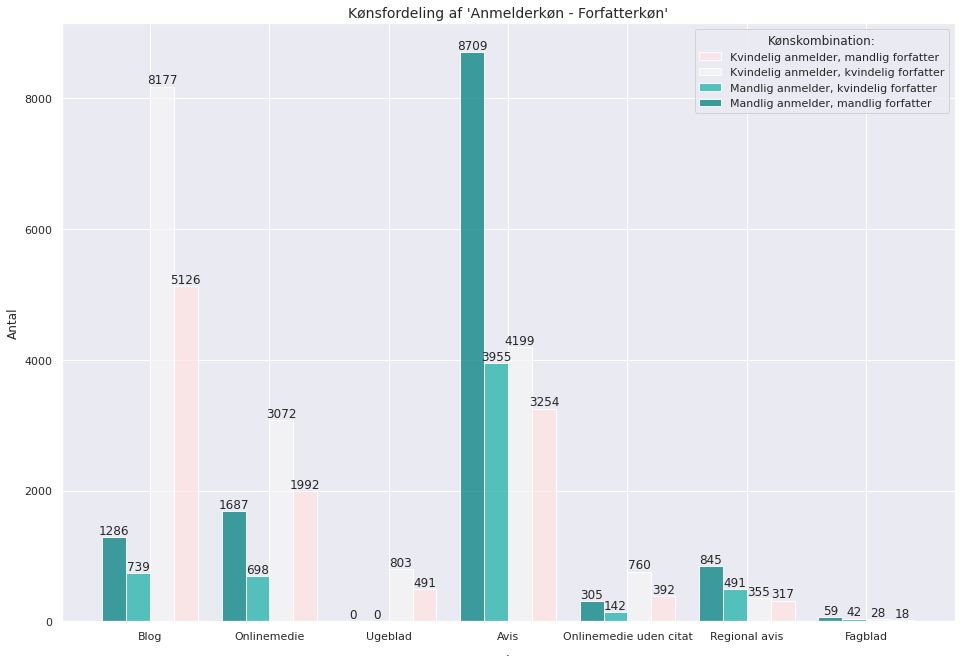

In [33]:
# gender distribution 
ax = sns.histplot(x="media_type_name", data = df, hue= 'gender_combi', hue_order = ['male_male','male_female','female_female','female_male'], multiple="dodge",shrink=.8, palette= my_palette4)
ax.figure.set_size_inches(16,11)
ax.set_title("Kønsfordeling af 'Anmelderkøn - Forfatterkøn'", fontsize =  14)
ax.set_ylabel('Antal')
ax.set_xlabel('.')

for container in ax.containers:
    ax.bar_label(container)

ax.legend(['Kvindelig anmelder, mandlig forfatter','Kvindelig anmelder, kvindelig forfatter','Mandlig anmelder, kvindelig forfatter','Mandlig anmelder, mandlig forfatter'])

ax.get_legend().set_title('Kønskombination:')


/tmp/ipykernel_180/128547534.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Blog', 'Online media', 'Newspaper'],size = 15)


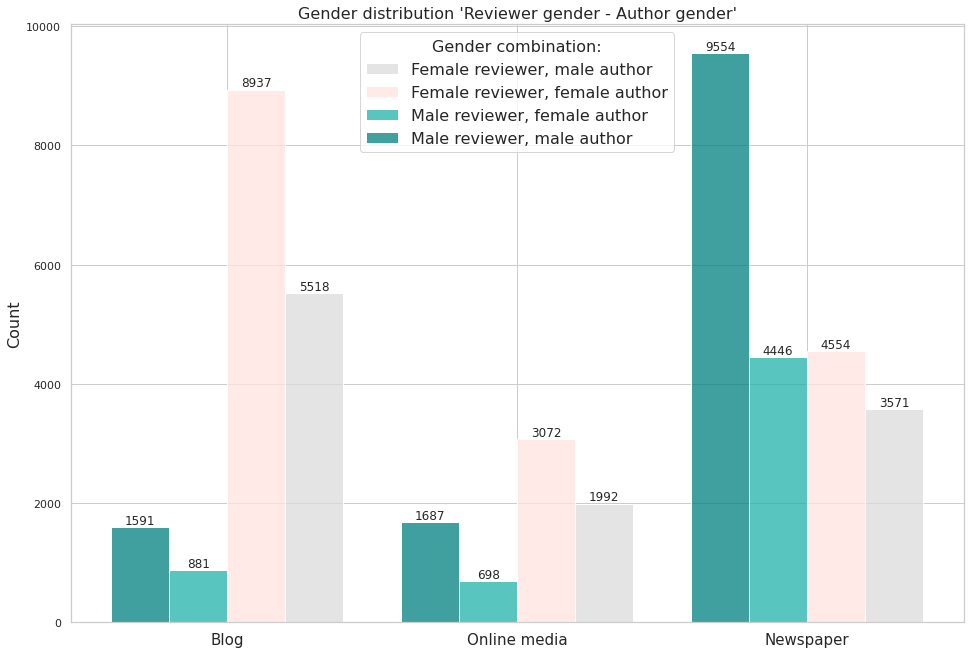

In [34]:
my_palette = ['teal','lightseagreen', 'mistyrose', 'gainsboro'] #whitesmoke, darkgray
sns.set_theme(style="whitegrid")

df_sub = df[(df['media_type_name'] != 'Ugeblad') & (df['media_type_name'] != 'Fagblad')]
df_sub = df_sub.replace('Onlinemedie uden citat', 'Blog')
df_sub = df_sub.replace('Regional avis', 'Newspaper')
df_sub = df_sub.replace('Avis', 'Newspaper')
df_sub = df_sub.replace('Onlinemedie', 'Online media')

ax = sns.histplot(x="media_type_name", data = df_sub, hue= 'gender_combi', hue_order = ['male_male','male_female','female_female','female_male'], multiple="dodge",shrink=.8, palette= my_palette)
ax.figure.set_size_inches(16,11)

my_labels= ['Female reviewer, male author','Female reviewer, female author','Male reviewer, female author','Male reviewer, male author']
ax.set_title("Gender distribution 'Reviewer gender - Author gender'", fontsize =  16)
ax.set_ylabel('Count', fontsize = 16)
ax.set_xlabel('', fontsize = 16)

ax.set_xticklabels(['Blog', 'Online media', 'Newspaper'],size = 15)

for container in ax.containers:
    ax.bar_label(container)

ax.legend(my_labels, prop={'size': 16})#, loc=(0.74,0.02))

ax.get_legend().set_title('Gender combination:', prop={'size': 16})
ax.figure.savefig('perspectivist_paper.png')

## Kønsbalance gennem årene - uden estimater

Nedenfor har vi plottet fordelingen af anmelder og forfatterkøn i danske aviser 2010-2021. 

Da antal anmeldelser ikke er ens for alle år, har vi valgt at normalisere vores data for derved bedre at kunne visualisere den procentvise fordeling. 

For alle anmelederse udgivet i årene 2010-2021 er ca. to ud tre skrevet af mænd. 
Ud af disse er ca. to ud af tre ophandlende mandlige forfattere. 

Denne tendens går igen for alle årene, dog med et lille fald ad mand-mand kombinationen i de senere år. 

Text(0.5, 1.0, 'Kønsbalance i Danske Aviser (normaliseret) - uden estimater, 2010-2021')

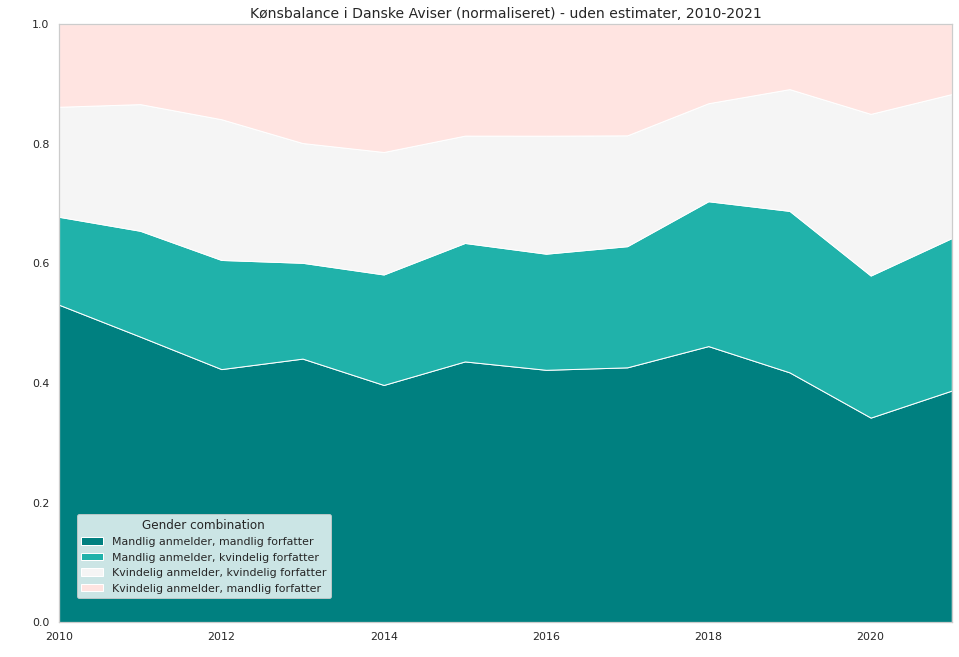

In [36]:
grouped = df_np.groupby(['year','gender_combi']).size().unstack()
normalized_np = grouped.div(grouped.sum(axis=1),axis=0)

my_labels = ['Mandlig anmelder, mandlig forfatter','Mandlig anmelder, kvindelig forfatter','Kvindelig anmelder, kvindelig forfatter','Kvindelig anmelder, mandlig forfatter']
#my_labels = ['Male reviewer, male author','Male reviewer, female author', 'Female reviewer, female author','Female reviewer, male author']

fig, ax = plt.subplots(figsize=(16,11))
sub_to_plot = normalized_np[['male_male','male_female','female_female','female_male']]
ax.stackplot(sub_to_plot.index, sub_to_plot.T, labels=sub_to_plot.columns,colors= my_palette4)
#fig.legend(my_labels, title="Kønskombination", loc=(0.08,0.09))
fig.legend(my_labels, title="Gender combination", loc=(0.08,0.09))
ax.autoscale(enable=True, axis='both', tight=True)
ax.set_title("Kønsbalance i Danske Aviser (normaliseret) - uden estimater, 2010-2021",fontdict= { 'fontsize': 14, 'fontweight':'normal'})
#ax.set_title("Gender Balance in Danish Newspapers (normalized), 2010-2021",fontdict= { 'fontsize': 14, 'fontweight':'normal'})

## Bøger anmeldt på tværs af køn

Nedenfor har vi kigget på bøger der er anmeldt mere end én gang. Hvordan fordeler anmelderkønnene sig her?

I det nedenstående plot kan vi se at...
- Knap 600 bøger er kun anmeldt af kvindelige forfattere. 
- Den midterste søjle indikerer at ca. 900 bøger er blevet anmeldt af lige mange mænd og kvinder. 
- Over 1400 bøger kun er anmeldt af mandlige forfattere. 




Got  6552 titles!


<AxesSubplot:title={'center':'Antal anmeldelser for bøger anmeldt > 1 gang'}, xlabel='Anmelderkøn: Mand 0 - Kvinde 1', ylabel='Antal'>

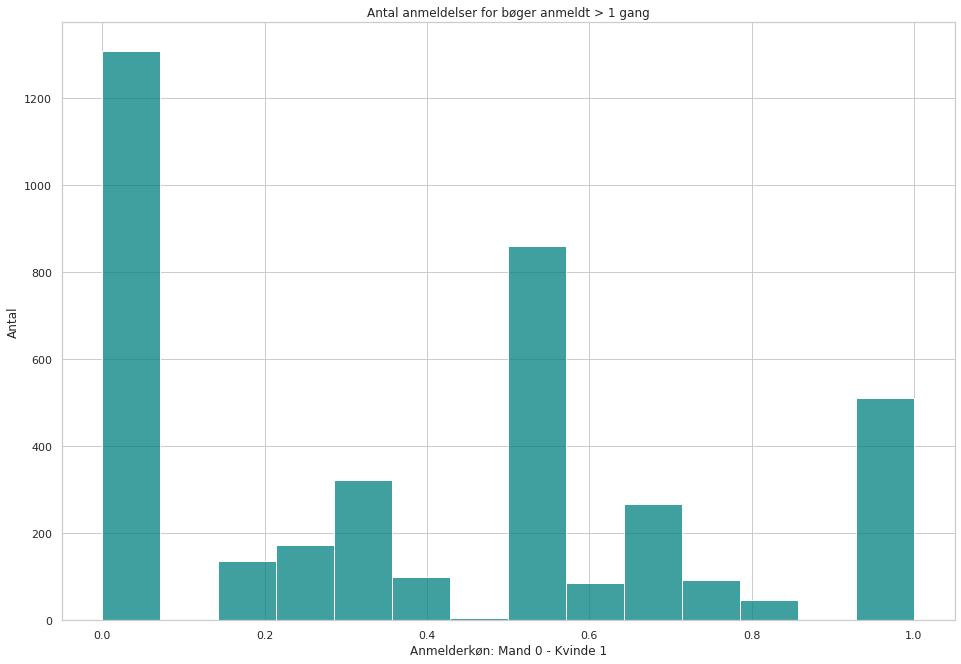

In [37]:
def plot_gender(dataframe):
    ax = sns.histplot(data=dataframe, x="gender", color=['teal'])
    ax.figure.set_size_inches(16,11)

    ax.set_title(f"Antal anmeldelser for bøger anmeldt > 1 gang")
    ax.set_ylabel('Antal')
    ax.set_xlabel('Anmelderkøn: Mand 0 - Kvinde 1')
    
    return ax

df_to_plot = construct_new_dataframe(df_np)
df_multiple_rev = df_to_plot[df_to_plot['review_count']> 1]
plot_gender(df_multiple_rev)

### Hvordan udvikler det sig over tid? 



Got  686 titles!
Got  693 titles!
Got  651 titles!
Got  581 titles!
Got  591 titles!
Got  636 titles!
Got  632 titles!
Got  584 titles!
Got  570 titles!
Got  504 titles!
Got  440 titles!
Got  379 titles!


Text(0.5, 0.98, 'Antal anmeldelser for bøger anmeldt > 1 gang')

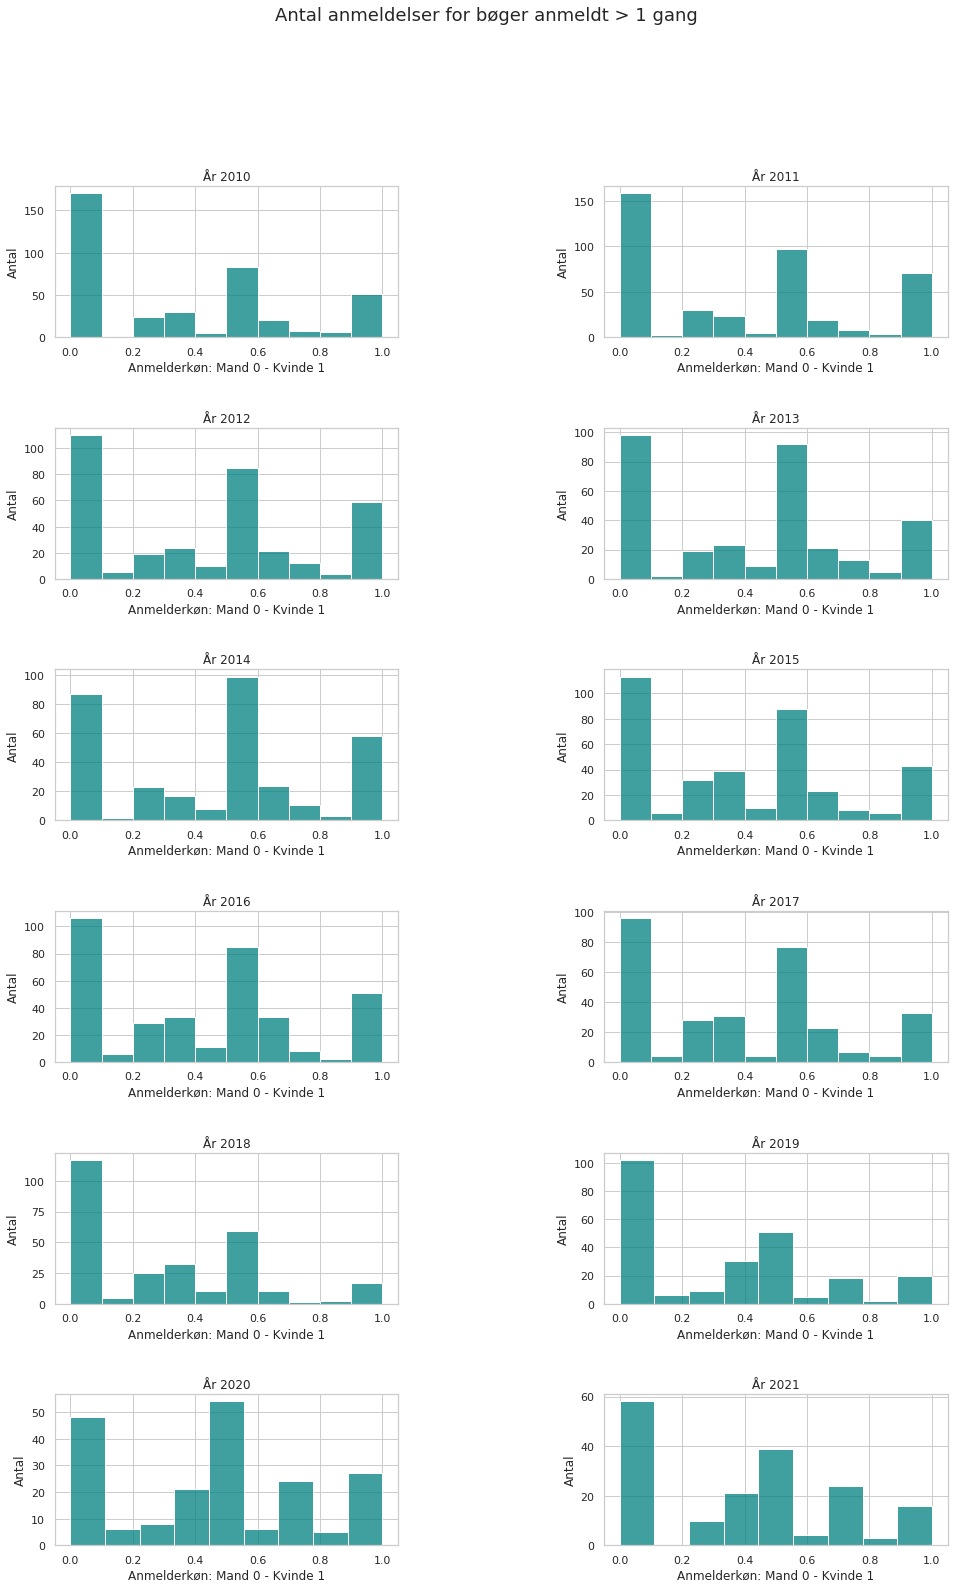

In [38]:
fig = plt.figure(figsize=(16,25))
fig.subplots_adjust(hspace=0.6, wspace=0.6)
    
for i,j in enumerate(range(2010, 2022)):
    yearly_df = df_np[df_np['year'] == j]
    df_to_plot = construct_new_dataframe(yearly_df)
    df_multiple_rev = df_to_plot[df_to_plot['review_count']> 1]

    ax = fig.add_subplot(6, 2, i+1)
    sns.histplot(data=df_multiple_rev, x="gender", color=['teal'])
    ax.set_title(f"År {j}")
    ax.set_ylabel('Antal')
    ax.set_xlabel('Anmelderkøn: Mand 0 - Kvinde 1')
    
fig.suptitle('Antal anmeldelser for bøger anmeldt > 1 gang', fontsize = 18)
    

## Karakterer og kønsfordeling 

På nedenstående plot har vi karakterskalaen 1-6 på x-aksen og anmelder-køn på y-aksen. 0.0 er bøger kun anmeldt af mænd, 1.0 er bøger kun anmeldt af kvinder, 0.5 er bøger der er anmeldt ligemeget af mænd og kvinder. 

Her ses det igen at anmelderkøn korrelerer med forfatterkøn. Det vil sige, at mænd anmelder flere mandlige forfattere og kvindelige anmeldere anmelder flere kvindelige forfattere. 


Got  6552 titles!


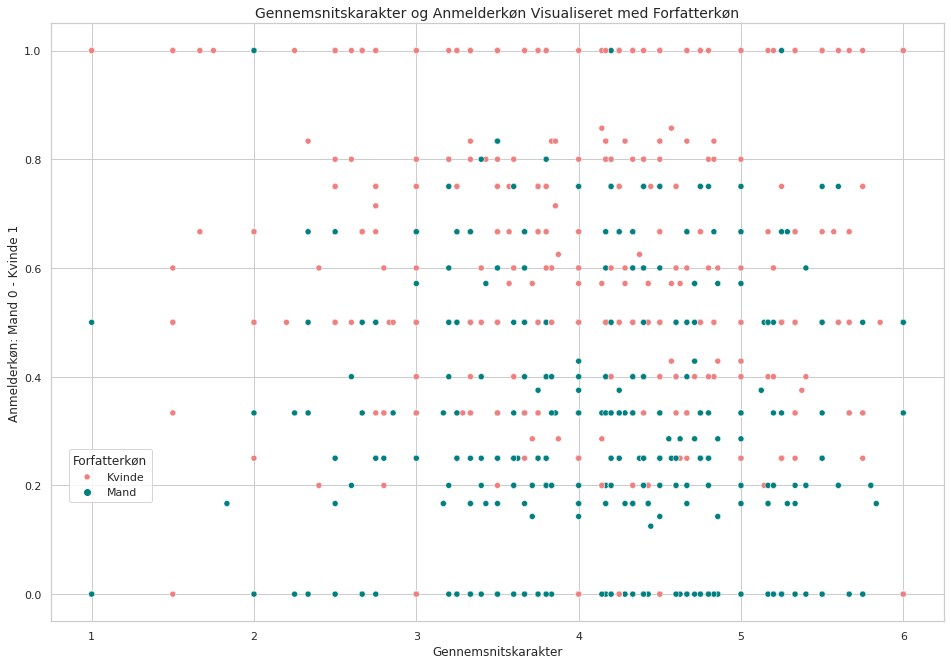

In [39]:
df_to_plot = construct_new_dataframe(df_np)

ax = sns.scatterplot(data=df_to_plot, x="average_grade", y="gender", hue=df_to_plot.author_gender, hue_order = ['male','female'],palette=my_palette2)
ax.figure.set_size_inches(16,11)
ax.set_title("Gennemsnitskarakter og Anmelderkøn Visualiseret med Forfatterkøn",fontdict= { 'fontsize': 14, 'fontweight':'normal'})
ax.set_xlabel('Gennemsnitskarakter')
ax.set_ylabel('Anmelderkøn: Mand 0 - Kvinde 1')

ax.legend(['Kvinde','Mand'], title="Forfatterkøn", loc=(0.02,0.2))
